In [1]:
pip install pandas numpy matplotlib scipy seaborn scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 985.4 kB/s  0:00:21m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 2.2 MB/s  0:00:03 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [seaborn]m3/5 [scikit-learn]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import os

os.makedirs("data", exist_ok=True)   # create the folder if it doesn't exist
df.to_csv("data/tire_raw.csv", index=False)


In [5]:
import numpy as np
import pandas as pd
np.random.seed(42)
n = 1200

df = pd.DataFrame({
    "tire_id": [f"T{100000+i}" for i in range(n)],
    "vehicle_type": np.random.choice(["car","truck","motorbike","van"], size=n, p=[0.6,0.2,0.1,0.1]),
    "mileage_km": np.clip(np.random.normal(50000, 20000, n).astype(int), 0, None),
    "tire_age_months": np.random.exponential(24, n).astype(int),
    "initial_tread_mm": np.round(np.random.normal(8.5, 0.5, n), 3),
})
# derive current_tread and wear
df['current_tread_mm'] = np.round(df['initial_tread_mm'] - np.random.exponential(1.5, n), 3)
df['wear_mm'] = np.round(df['initial_tread_mm'] - df['current_tread_mm'], 3)
df['tire_pressure_psi'] = np.round(np.random.normal(32, 3, n), 2)
df['load_index'] = np.random.choice([87,91,95,98,100,102,105], size=n)
df['speed_rating'] = np.random.choice(['H','V','T','S','R'], size=n)
df['ambient_temp_c'] = np.round(np.random.normal(15, 10, n), 2)
df['replacement_flag'] = ((df['current_tread_mm'] < 2.0) | (df['wear_mm'] > 6.0)).astype(int)

# optionally save
df.to_csv("data/tire_raw.csv", index=False)


In [6]:
df.head()          # first 5 rows (or df.head(10))
df.info()          # columns, dtypes, non-null counts
df.describe(include="all").T   # summary stats for numeric and categorical


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tire_id            1200 non-null   object 
 1   vehicle_type       1200 non-null   object 
 2   mileage_km         1200 non-null   int64  
 3   tire_age_months    1200 non-null   int64  
 4   initial_tread_mm   1200 non-null   float64
 5   current_tread_mm   1200 non-null   float64
 6   wear_mm            1200 non-null   float64
 7   tire_pressure_psi  1200 non-null   float64
 8   load_index         1200 non-null   int64  
 9   speed_rating       1200 non-null   object 
 10  ambient_temp_c     1200 non-null   float64
 11  replacement_flag   1200 non-null   int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 112.6+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
tire_id,1200,1200,T100000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vehicle_type,1200,4,car,714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage_km,1200.0,NaN,NaN,NaN,50973.6325,19802.148133,0.0,37709.75,50601.5,64162.5,113862.0
tire_age_months,1200.0,NaN,NaN,NaN,23.3225,23.681692,0.0,6.0,16.0,33.0,185.0
initial_tread_mm,1200.0,NaN,NaN,NaN,8.484185,0.511346,6.996,8.13275,8.484,8.8175,10.122
current_tread_mm,1200.0,NaN,NaN,NaN,6.995887,1.598593,-2.831,6.36875,7.355,8.079,9.849
wear_mm,1200.0,NaN,NaN,NaN,1.488297,1.505659,0.006,0.41425,1.0355,2.05225,11.288
tire_pressure_psi,1200.0,NaN,NaN,NaN,31.894392,3.015735,23.3,29.8925,31.85,33.98,41.29
load_index,1200.0,NaN,NaN,NaN,97.113333,5.667797,87.0,91.0,98.0,102.0,105.0
speed_rating,1200,5,R,251,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (df.isna().mean()*100).sort_values(ascending=False)
pd.concat([missing, missing_pct], axis=1, keys=['missing_count','missing_pct'])


,missing_count,missing_pct
tire_id,0,0.0
vehicle_type,0,0.0
mileage_km,0,0.0
tire_age_months,0,0.0
initial_tread_mm,0,0.0
current_tread_mm,0,0.0
wear_mm,0,0.0
tire_pressure_psi,0,0.0
load_index,0,0.0
speed_rating,0,0.0


In [8]:
df.duplicated().sum()            # any complete-row duplicates
df[df.duplicated(subset=['tire_id'], keep=False)].shape   # duplicates by key (tire_id)


(0, 12)

In [9]:
df.dtypes
# check unique values for categorical-ish fields
for c in ['vehicle_type','speed_rating','load_index']:
    print(c, df[c].unique()[:30])


vehicle_type ['car' 'van' 'truck' 'motorbike']
speed_rating ['H' 'R' 'S' 'T' 'V']
load_index [ 91  98 102  95 100  87 105]


In [10]:
df['vehicle_type'] = df['vehicle_type'].str.strip().str.lower()
df['speed_rating'] = df['speed_rating'].str.strip().str.upper()
df['mileage_km'] = pd.to_numeric(df['mileage_km'], errors='coerce')


In [11]:
# Range validation (domain checks)
ranges = {
    'tire_pressure_psi': (15, 50),
    'initial_tread_mm': (4, 12),
    'current_tread_mm': (0, 12),
    'wear_mm': (0, 12),
    'mileage_km': (0, 1_000_000),
    'tire_age_months': (0, 240)
}

out_of_range = {}
for col,(lo,hi) in ranges.items():
    mask = (df[col] < lo) | (df[col] > hi) | (df[col].isna())
    out_of_range[col] = mask.sum()
pd.Series(out_of_range)


tire_pressure_psi    0
initial_tread_mm     0
current_tread_mm     4
wear_mm              0
mileage_km           0
tire_age_months      0
dtype: int64

In [12]:
#Outliers (IQR & Z-score)
def iqr_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    return series[(series < q1 - 1.5*iqr) | (series > q3 + 1.5*iqr)]

for col in ['mileage_km','tire_pressure_psi','current_tread_mm','wear_mm']:
    s = pd.to_numeric(df[col], errors='coerce').dropna()
    print(col, "outliers:", iqr_outliers(s).shape[0])


mileage_km outliers: 3
tire_pressure_psi outliers: 6
current_tread_mm outliers: 55
wear_mm outliers: 60


Text(0.5, 0, 'psi')

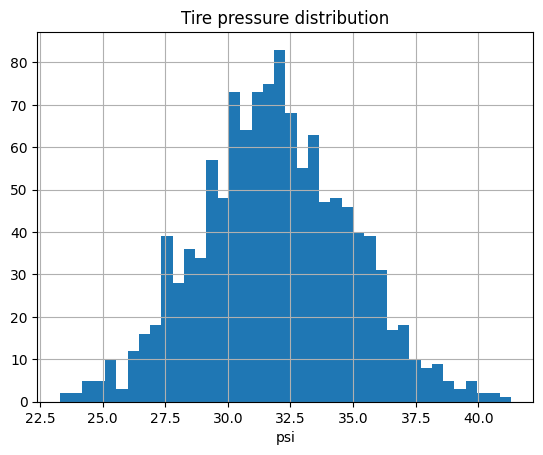

In [13]:
#Exploratory Data Analysis
import matplotlib.pyplot as plt
df['tire_pressure_psi'].hist(bins=40)
plt.title('Tire pressure distribution'); plt.xlabel('psi')


<Axes: >

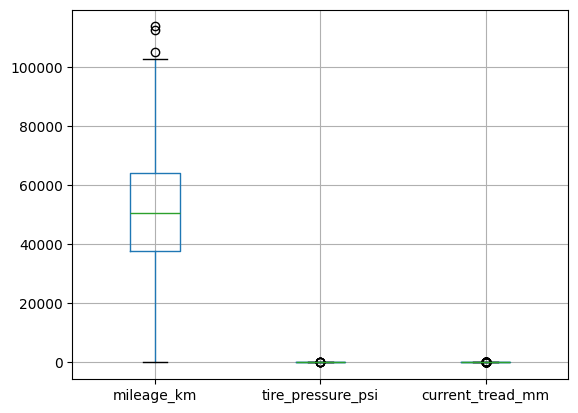

In [14]:
#Boxplots for outlier spotting
df.boxplot(column=['mileage_km','tire_pressure_psi','current_tread_mm'])

Text(0.5, 1.0, 'Wear vs Mileage')

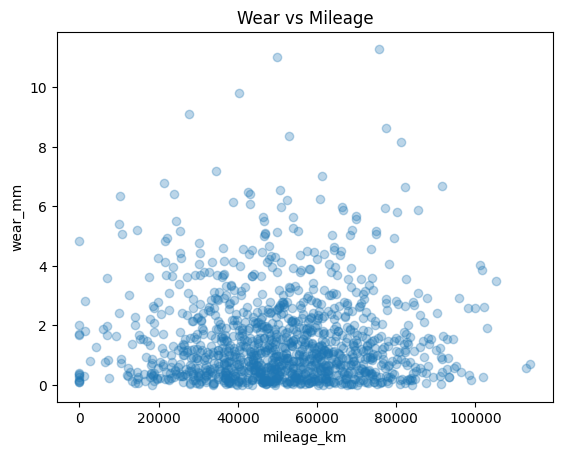

In [15]:
#Correlations & scatter plots
# numeric correlations
df.select_dtypes('number').corr()['wear_mm'].sort_values()

# scatter: wear vs mileage
plt.scatter(df['mileage_km'], df['wear_mm'], alpha=0.3)
plt.xlabel('mileage_km'); plt.ylabel('wear_mm'); plt.title('Wear vs Mileage')

In [16]:
#Group summaries
df.groupby('vehicle_type')['wear_mm'].agg(['count','mean','median','std']).sort_values('mean', ascending=False)


,count,mean,median,std
vehicle_type,,,,
motorbike,128,1.631586,1.036,1.561521
van,125,1.549048,1.030,1.754374
car,714,1.473213,1.045,1.448771
truck,233,1.423215,1.002,1.505796


In [17]:
df.to_csv("data/tire_cleaned.csv", index=False)